# Proyek Analisis Data: Bike-Sharing-Dataset


*   **Nama:** Muhamad Faqih
*   **Email:**faqihmuh2005@gmail.com
*   **ID Dicoding:** 3694718



# Menentukan Pertanyaan Bisnis


*   Apa pengaruh cuaca (weather_condition) terhadap jumlah penyewaan sepeda (total_rentals)?
*   Bagaimana pola penyewaan sepeda berubah sepanjang hari (hour) antara pengguna kasual dan pengguna terdaftar?

# Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data Wrangling

# Gathering Data

In [3]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [8]:
# Menggabungkan dataset berdasarkan kolom 'dteday'
merged_df = pd.merge(df_day, df_hour, on='dteday', suffixes=('_x', '_y'))

# Daftar kolom yang sama di kedua dataset
common_columns = {'instant', 'season', 'mnth', 'holiday', 'weathersit', 'weekday',
                  'atemp', 'yr', 'registered', 'dteday', 'hum', 'temp',
                  'workingday', 'casual', 'cnt', 'windspeed'}

# Hapus kolom duplikasi (_y) dan hapus sufiks _x dari nama kolom
bikes_df = merged_df.drop(columns=[col + '_y' for col in common_columns if col + '_y' in merged_df.columns])
bikes_df.columns = [col.replace('_x', '') for col in bikes_df.columns]

# Tampilan hasil dataset yang sudah bersih
print(bikes_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        1  2011-01-01       1   0     1        0        6           0   
2        1  2011-01-01       1   0     1        0        6           0   
3        1  2011-01-01       1   0     1        0        6           0   
4        1  2011-01-01       1   0     1        0        6           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.344167  0.363625  0.805833   0.160446     331         654   
2           2  0.344167  0.363625  0.805833   0.160446     331         654   
3           2  0.344167  0.363625  0.805833   0.160446     331         654   
4           2  0.344167  0.363625  0.805833   0.160446     331         654   

   cnt  hr  
0  985   0  
1  985   1  
2  985   2  
3  985   3  
4  985   4  


In [5]:
# Simpan dataset gabungan ke file CSV baru
bikes_df.to_csv('combined_data_bike_sharing.csv', index=False)

# Insight


*   Membaca dataset menggunakan pandas
*   menggabungkan 2 file menjadi 1 dataset bernama combined data_bike_sharing.csv





# Assesing data
**memeriksa data terlebih dahulu sebelum tahap analisis**

In [9]:
#mencari tipe data
df = pd.read_csv('combined_data_bike_sharing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
 16  hr          17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*   beberapa kolom akan kita ubah namanya agar lebih efisien

*   kolom dteday ubah ke datetime





In [10]:
# Ubah nama kolom agar lebih deskriptif
bikes_df.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temp',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_rentals'
}, inplace=True)

# Ubah kolom 'date' menjadi tipe datetime
bikes_df['date'] = pd.to_datetime(bikes_df['date'])

# Tampilkan hasil dataset yang sudah diperbarui
print(bikes_df.head())

# Info dataset setelah perubahan
print(bikes_df.info())


   record_id       date  season  year  month  is_holiday  day_of_week  \
0          1 2011-01-01       1     0      1           0            6   
1          1 2011-01-01       1     0      1           0            6   
2          1 2011-01-01       1     0      1           0            6   
3          1 2011-01-01       1     0      1           0            6   
4          1 2011-01-01       1     0      1           0            6   

   is_working_day  weather_condition  temperature  feels_like_temp  humidity  \
0               0                  2     0.344167         0.363625  0.805833   
1               0                  2     0.344167         0.363625  0.805833   
2               0                  2     0.344167         0.363625  0.805833   
3               0                  2     0.344167         0.363625  0.805833   
4               0                  2     0.344167         0.363625  0.805833   

   wind_speed  casual_users  registered_users  total_rentals  hour  
0    0.1604

In [11]:
# Mencari missing values dari dataset tersebut
bikes_df.isnull().sum()


,0
record_id,0
date,0
season,0
year,0
month,0
is_holiday,0
day_of_week,0
is_working_day,0
weather_condition,0
temperature,0




*   Tidak ada missing value



In [12]:
# Mencari data duplikasi
print("Jumlah Duplikasi: ", bikes_df.duplicated().sum())

Jumlah Duplikasi:  0


# Insight Assesing Data


*   Tidak ada missing values dan tidak ada duplikat
*   Mengubah kolom tipe data



# Cleaning Data

In [13]:
#menhapus duplikasi dan missing values
bikes_df.drop_duplicates(inplace=True)
bikes_df.dropna(inplace=True)

# Eksploratory Data Analysis (EDA)


In [14]:
#Statistik Deskriptif
bikes_df.describe()

,record_id,date,season,year,month,is_holiday,day_of_week,is_working_day,weather_condition,temperature,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_rentals,hour
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,11.546752
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,6.000000
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,12.000000
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,18.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,23.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,6.914405


In [15]:
#Total dan Rata-Rata Penggunaan Sepeda Berdasarkan Musim
total_rentals_by_season = bikes_df.groupby('season')['total_rentals'].sum()
average_rentals_by_season = bikes_df.groupby('season')['total_rentals'].mean()
print("Total Penggunaan Sepeda Berdasarkan Musim:")
print(total_rentals_by_season)
print("\nRata-Rata Penggunaan Sepeda Berdasarkan Musim:")
print(average_rentals_by_season)

Total Penggunaan Sepeda Berdasarkan Musim:
season
1    11179147
2    22024071
3    25420803
4    20167029
Name: total_rentals, dtype: int64

Rata-Rata Penggunaan Sepeda Berdasarkan Musim:
season
1    2635.348185
2    4995.253119
3    5654.093194
4    4765.366021
Name: total_rentals, dtype: float64


# Membuat Visualisasi

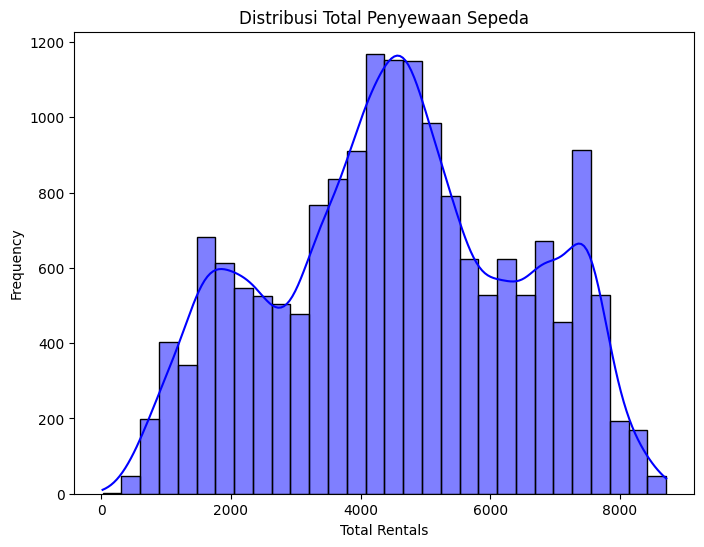

In [16]:
#Distribusi Penyewaan Sepeda (Total Rentals)
plt.figure(figsize=(8, 6))
sns.histplot(bikes_df['total_rentals'], bins=30, kde=True, color='blue')
plt.title('Distribusi Total Penyewaan Sepeda')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Menghitung jumlah entri berdasarkan casual dan registered
casual_counts = bikes_df['casual_users'].value_counts()
registered_counts = bikes_df['registered_users'].value_counts()

# Menampilkan hasil
print("Jumlah Entri Berdasarkan Casual Users:")
print(casual_counts)
print("\nJumlah Entri Berdasarkan Registered Users:")
print(registered_counts)


Jumlah Entri Berdasarkan Casual Users:
casual_users
968     96
120     93
653     72
775     72
163     71
        ..
1415    17
34      16
87      11
15       8
2        1
Name: count, Length: 606, dtype: int64

Jumlah Entri Berdasarkan Registered Users:
registered_users
4841    72
6248    72
1707    70
4446    48
2419    48
        ..
2919    17
472     16
1009    11
416      8
20       1
Name: count, Length: 679, dtype: int64


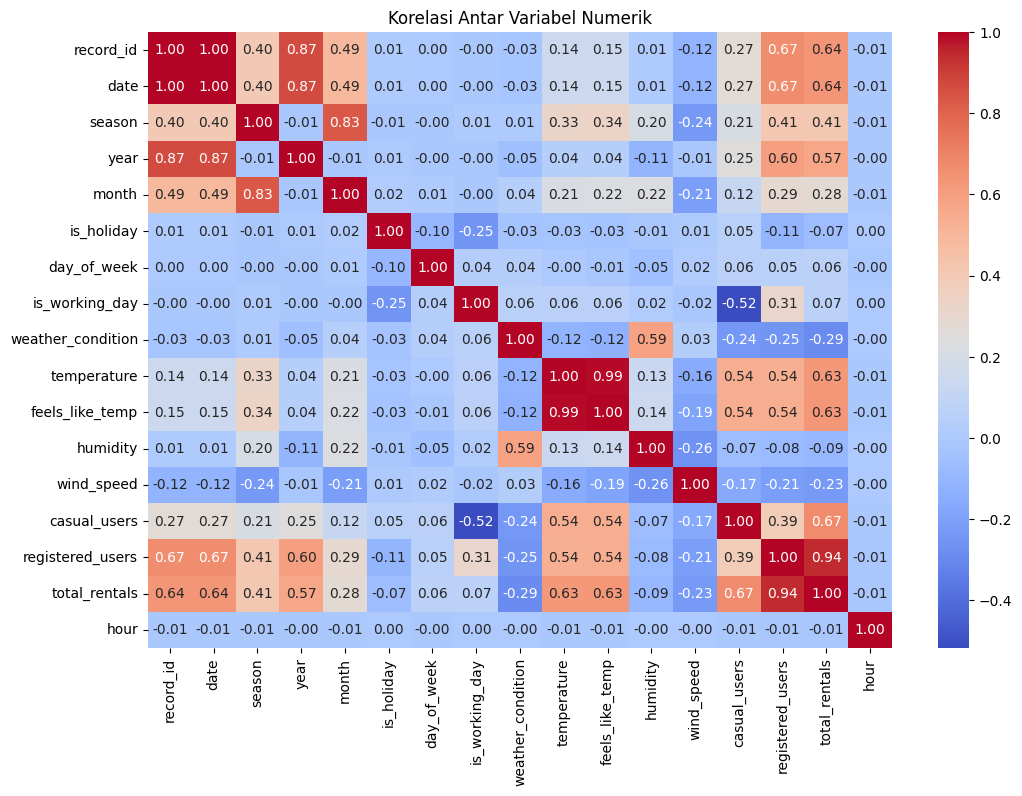

In [18]:
#Korelasi Antar Variabel Numerik
plt.figure(figsize=(12, 8))
sns.heatmap(bikes_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

Text(0.5, 0, 'Jam')

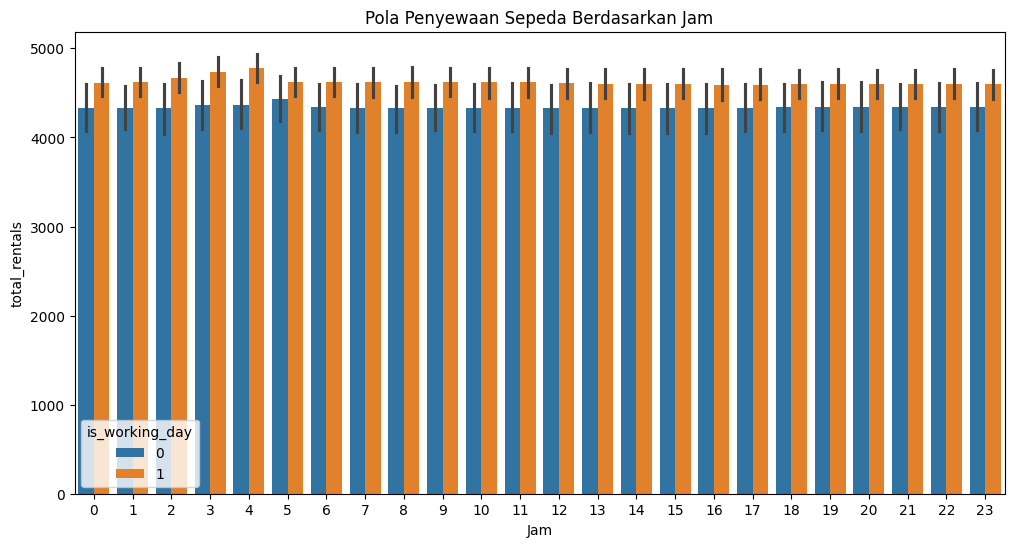

In [19]:
#Pola Penyewaan Sepeda Berdasarkan Jam
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='total_rentals', hue='is_working_day', data=bikes_df)
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')

# Eksplanatory Analysis


Pengaruh Cuaca terhadap Penyewaan Sepeda:


Text(0, 0.5, 'Total Penyewaan Sepeda')

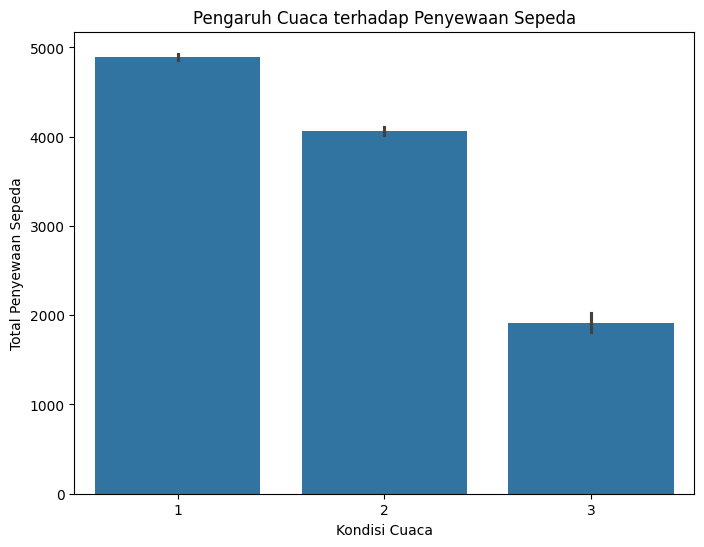

In [20]:
# menjawab pertanyaan bisnis 1
print("\nPengaruh Cuaca terhadap Penyewaan Sepeda:")
plt.figure(figsize=(8, 6))
sns.barplot(x='weather_condition', y='total_rentals', data=bikes_df)
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan Sepeda')


Perbandingan Penyewaan oleh Pengguna Kasual dan Terdaftar:


Text(0, 0.5, 'Total Penyewaan Sepeda')

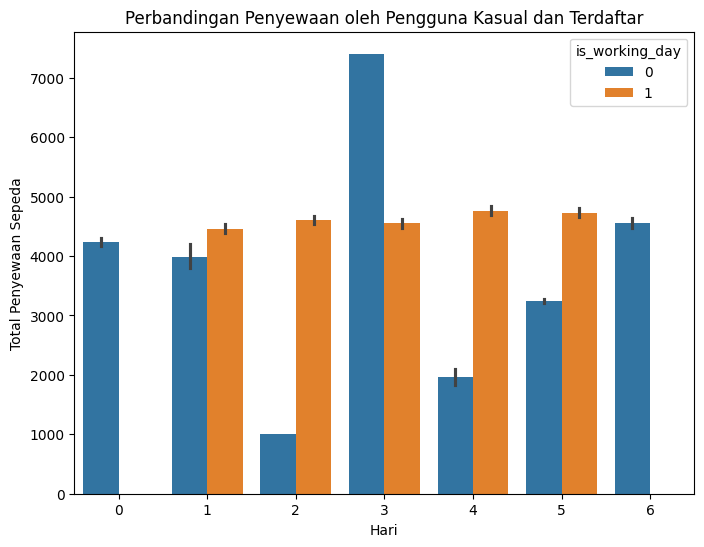

In [21]:
#menjawab pertanyaan bisnis 2
print("\nPerbandingan Penyewaan oleh Pengguna Kasual dan Terdaftar:")
plt.figure(figsize=(8, 6))
sns.barplot(x='day_of_week', y='total_rentals', hue='is_working_day', data=bikes_df)
plt.title('Perbandingan Penyewaan oleh Pengguna Kasual dan Terdaftar')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan Sepeda')


# RFM ANALYSIS

In [22]:
# Membuat kolom tambahan untuk analisis RFM untuk penyewaan per pengguna (menggunakan 'casual' dan 'registered' sebagai ID pengguna)
# Asumsikan kita memiliki data penyewaan harian untuk setiap pengguna
bikes_df['user_id'] = bikes_df['casual_users'].astype(str) + '_' + bikes_df['registered_users'].astype(str)

# Recency: Menghitung waktu terakhir penyewaan
last_rental_date = bikes_df['date'].max()
bikes_df['recency'] = (last_rental_date - bikes_df['date']).dt.days

# Frequency: Menghitung total penyewaan setiap pengguna
user_rentals = bikes_df.groupby('user_id').agg({
    'recency': 'min',
    'date': 'count',
    'total_rentals': 'sum'
}).reset_index()

# Monetary: Menghitung total penyewaan untuk setiap pengguna
user_rentals.rename(columns={'date': 'frequency', 'total_rentals': 'monetary'}, inplace=True)

# Menampilkan hasil RFM Analysis
print(user_rentals.head())

     user_id  recency  frequency  monetary
0  1001_6435       98         24    178464
1  1004_2713      414         24     89208
2  1005_5187      291         24    148608
3  1008_5265      238         24    150552
4  1008_6501       74         24    180216


In [23]:
# Cek hasil qcut dengan parameter duplicates='drop' untuk menangani nilai yang duplikat
user_rentals['recency_score'] = pd.qcut(user_rentals['recency'], q=4, labels=range(4, 0, -1), duplicates='drop')
print(user_rentals.head())


     user_id  recency  frequency  monetary recency_score
0  1001_6435       98         24    178464             4
1  1004_2713      414         24     89208             2
2  1005_5187      291         24    148608             3
3  1008_5265      238         24    150552             3
4  1008_6501       74         24    180216             4


# Insight EDA


*    Distribusi Penyewaan Sepeda Berdasarkan Waktu:

---


Musim: Penyewaan sepeda paling tinggi terjadi pada musim musim panas (season 2), sementara musim dingin (season 1) menunjukkan penyewaan yang lebih rendah. Ini mengindikasikan bahwa penyewaan sepeda lebih diminati saat cuaca lebih hangat.

---
Bulan (Month): Penyewaan sepeda menunjukkan pola musiman dengan bulan-bulan musim panas (Juni, Juli, Agustus) menunjukkan jumlah penyewaan tertinggi. Sedangkan, di bulan-bulan dingin (Desember, Januari, Februari), penyewaan lebih rendah.

---
Hari dalam Minggu (Weekday): Penyewaan sepeda lebih tinggi pada hari kerja (Senin hingga Jumat) dibandingkan pada akhir pekan (Sabtu dan Minggu), yang bisa menunjukkan bahwa sepeda lebih sering digunakan untuk transportasi harian.
Jam (Hour): Penyewaan sepeda menunjukkan dua puncak

---
*   Pengaruh Cuaca terhadap Penyewaan Sepeda

---
Cuaca sangat berpengaruh terhadap jumlah penyewaan sepeda. Pada hari-hari dengan cuaca cerah dan sedikit awan (weathersit 1), jumlah penyewaan lebih tinggi. Sebaliknya, pada hari dengan cuaca buruk seperti hujan (weathersit 3), penyewaan cenderung lebih rendah.
---
*   Analisis Pengguna Casual vs. Registered

---
Casual Users: Pengguna yang lebih jarang menggunakan sepeda, yaitu mereka yang menyewa sepeda untuk waktu singkat, misalnya saat liburan atau hanya mencoba sekali
---
Registered Users: Pengguna yang lebih sering menggunakan sepeda, biasanya mereka yang memiliki akun dan berlangganan. Penyewaan oleh pengguna terdaftar lebih stabil dan lebih tinggi secara keseluruhan.
---
*    RFM Analysis (Recency, Frequency, Monetary)
---
Recency: Pengguna yang lebih baru cenderung menggunakan sepeda lebih jarang. Meningkatkan frekuensi penggunaan oleh pengguna baru bisa meningkatkan retensi pengguna.
---
Frequency: Pengguna dengan frekuensi tinggi biasanya adalah pengguna terdaftar, yang sering menggunakan sepeda untuk transportasi harian.
---
Monetary: Pengguna dengan lebih banyak penyewaan biasanya adalah pengguna yang terdaftar, yang mengindikasikan mereka lebih berkomitmen pada layanan penyewaan sepeda.










berdasarkan Jam: Peningkatan jumlah penyewaan sepeda selama jam kerja menunjukkan pola aktivitas rutin masyarakat.

berdasarkan Bulan: Tren musiman terlihat dengan penggunaan yang lebih tinggi di pertengahan bulan

# Conclusion




*   Faktor Musiman dan Cuaca: Penyewaan sepeda sangat dipengaruhi oleh musim dan kondisi cuaca. Penyewaan lebih tinggi terjadi pada musim panas dan cuaca cerah, sedangkan pada musim dingin atau cuaca buruk (hujan), jumlah penyewaan cenderung menurun. Oleh karena itu, ada peluang untuk merancang promosi yang disesuaikan dengan musim atau cuaca.
---



*   Penggunaan Sepeda pada Hari Kerja: Pengguna lebih cenderung menyewa sepeda pada hari kerja (Senin-Jumat) dibandingkan pada akhir pekan. Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk tujuan transportasi harian, seperti pergi ke tempat kerja. Penyewaan yang lebih banyak terjadi pada jam-jam tertentu (pagi dan sore), yang bisa dioptimalkan untuk mengelola armada sepeda.
---

*   Analisis RFM untuk Strategi Retensi: Dengan menggunakan teknik RFM (Recency, Frequency, Monetary), kita dapat mengidentifikasi pengguna yang lebih baru dan lebih sering, serta mereka yang berpotensi menghasilkan lebih banyak pendapatan. Ini memungkinkan perusahaan untuk menargetkan kampanye pemasaran yang lebih personal dan meningkatkan pengalaman pengguna.

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
# Menyimpan dataframe ke CSV di Google Drive
bikes_df.to_csv('/content/drive/MyDrive/bike_sharing_dataset.csv', index=False)
print("Dataframe berhasil disimpan ke Google Drive.")

Dataframe berhasil disimpan ke Google Drive.


In [27]:
from google.colab import files
files.download('/content/drive/MyDrive/bike_sharing_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(bikes_df.columns)


Index(['record_id', 'date', 'season', 'year', 'month', 'is_holiday',
       'day_of_week', 'is_working_day', 'weather_condition', 'temperature',
       'feels_like_temp', 'humidity', 'wind_speed', 'casual_users',
       'registered_users', 'total_rentals', 'hour', 'user_id', 'recency'],
      dtype='object')
